<a href="https://colab.research.google.com/github/baileybunch5dad/bb5dad/blob/master/eli6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given a known starting point $x_1,x_2$ and a slope $m$ make a line have a length of $c=2$
$$
\begin{aligned}
\frac{y_2-y_1}{x_2-x_1} &= m & x_1,y_1,m \text{ given}\\
c &= 2 & c\text{ given}\\
\left( \frac{y_2-y_1}{x_2-x_1} \right)^2 &= m^2 & \text{from 1}\\
(y_2-y_1)^2 &= m^2(x_2-x_1)^2 & \text{eq A}  \\
a^2 + b^2 &= c^2 \\
(x_1,y_1) &= \text{start of hypotenuse} \\
(x_2,y_2) &= \text{end of hypotenuse} \\
a &= x_2 - x_1 \\
b &= y_2 - y_1 \\
c &= \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2} \\
2 &= \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2} \\
4 &= (x_2-x_1)^2 + (y_1-y_1)^2 \\
4 &=  (x_2-x_1)^2 + m^2(x_2-x_1)^2 & \text{from eq A} \\
4 &= (m^2 +1 )(x_2-x_1)^2 \\
\frac{4}{(m^2+1)} &= (x_2-x_1)^2 \\
\sqrt{\frac{4}{(m^2+1)}} &= x_2-x_1 \\
x_2 &= \frac{2}{\sqrt{m^2+1}} + x1 \\
y_2 &= m(x_1-x_2) + y1 \\
\end{aligned}
$$

[ 3.    3.    3.63  1.1   2.37  4.9  -3.  ]
[ 3.    3.    3.89  1.21  2.11  4.79 -2.  ]
[ 3.    3.    4.41  1.59  1.59  4.41 -1.  ]
[3. 3. 5. 3. 1. 3. 0.]
[3.   3.   4.41 4.41 1.59 1.59 1.  ]
[3.   3.   3.89 4.79 2.11 1.21 2.  ]
[3.   3.   3.63 4.9  2.37 1.1  3.  ]


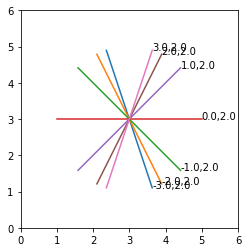

In [7]:
from matplotlib import pyplot as plt
import numpy as np
# draw a line 2 units long independent of its slope
slopes = np.linspace(-3, 3, 7)
x1 = 3
y1 = 3
plt.xlim(0,6)
plt.ylim(0,6)
for m in slopes:
  x2 = 2/np.sqrt(m*m+1)+x1
  y2 = m*(x2-x1)+y1
  x1a = x1-(x2-x1)
  y1a = 2*y1 - y2
  print(np.round(np.array([x1,y1,x2,y2,x1a,y1a,m]),2))
  slen=np.sqrt((x2-x1)*(x2-x1)+(y2-y1)*(y2-y1))
  plt.plot([x1a,x2],[y1a,y2])
  plt.text(x2,y2,str(round(m,2))+','+str(round(slen,2)))
plt.gca().set_aspect('equal')
plt.show()  